<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dive-into-Astropy-" data-toc-modified-id="Dive-into-Astropy--1">Dive into Astropy <a id="Modeling and Fitting"></a></a></span></li><li><span><a href="#Main-Components-of-Astropy" data-toc-modified-id="Main-Components-of-Astropy-2">Main Components of Astropy</a></span><ul class="toc-item"><li><span><a href="#Data-Type" data-toc-modified-id="Data-Type-2.1">Data Type</a></span><ul class="toc-item"><li><span><a href="#Units-and-Constants" data-toc-modified-id="Units-and-Constants-2.1.1">Units and Constants</a></span></li><li><span><a href="#Time-and-Date" data-toc-modified-id="Time-and-Date-2.1.2">Time and Date</a></span></li><li><span><a href="#Celestial-Coordinate-System" data-toc-modified-id="Celestial-Coordinate-System-2.1.3">Celestial Coordinate System</a></span></li></ul></li><li><span><a href="#Input-and-Output" data-toc-modified-id="Input-and-Output-2.2">Input and Output</a></span><ul class="toc-item"><li><span><a href="#Read-Data-from-Files" data-toc-modified-id="Read-Data-from-Files-2.2.1">Read Data from Files</a></span></li><li><span><a href="#Write-Data-to-Files" data-toc-modified-id="Write-Data-to-Files-2.2.2">Write Data to Files</a></span></li></ul></li><li><span><a href="#Data-Preprocessing-and-Statistics" data-toc-modified-id="Data-Preprocessing-and-Statistics-2.3">Data Preprocessing and Statistics</a></span><ul class="toc-item"><li><span><a href="#Convolution" data-toc-modified-id="Convolution-2.3.1">Convolution</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-2.3.2">Statistics</a></span></li></ul></li><li><span><a href="#Modeling-and-Fitting" data-toc-modified-id="Modeling-and-Fitting-2.4">Modeling and Fitting</a></span><ul class="toc-item"><li><span><a href="#Cosmological-Models" data-toc-modified-id="Cosmological-Models-2.4.1">Cosmological Models</a></span></li><li><span><a href="#Model-Fitting" data-toc-modified-id="Model-Fitting-2.4.2">Model Fitting</a></span></li></ul></li></ul></li><li><span><a href="#a-little-more..." data-toc-modified-id="a-little-more...-3">a little more...</a></span><ul class="toc-item"><li><span><a href="#Plan-an-observation" data-toc-modified-id="Plan-an-observation-3.1">Plan an observation</a></span></li><li><span><a href="#Checking-best-observational-time" data-toc-modified-id="Checking-best-observational-time-3.2">Checking best observational time</a></span></li><li><span><a href="#Do-some-preliminary-investigation" data-toc-modified-id="Do-some-preliminary-investigation-3.3">Do some preliminary investigation</a></span></li><li><span><a href="#If-someone-asks-you-what-Astronomy-is" data-toc-modified-id="If-someone-asks-you-what-Astronomy-is-3.4">If someone asks you what Astronomy is</a></span></li></ul></li></ul></div>

In [5]:
# import packages and plot setting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
import warnings
warnings.filterwarnings("ignore") # recomment change to 'default' to turn on warning

# Dive into Astropy <a id="Modeling and Fitting"></a>

Jianhang Chen

Nanjing University

https://github.com/cjhang/dive-into-astropy


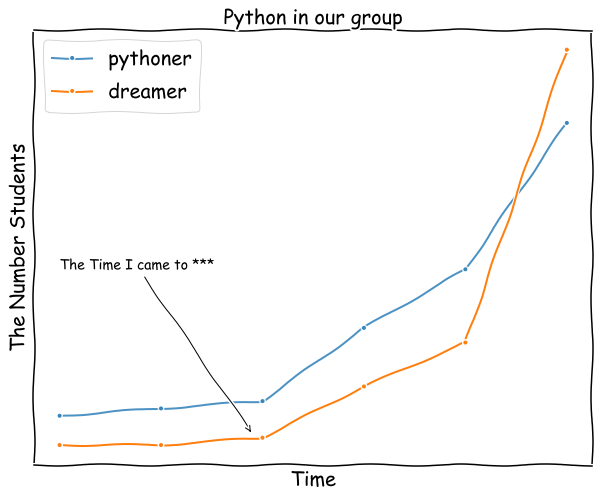

In [2]:
# Just for fun
with plt.xkcd():
    pythoner = array([0.5, 0.6, 0.7, 1.7, 2.5, 4.5])
    python_dreamer = array([0.1, 0.1, 0.2, 0.9, 1.5, 5.5])
    time = np.array([1,2,3,4,5,6])
    fig = plt.figure(figsize=(10,8))
    plt.xticks([])
    plt.yticks([])
    plt.plot(time, pythoner, '.-', label='pythoner', alpha=0.8)
    plt.plot(time, python_dreamer, '.-', label='dreamer')
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("The Number Students", fontsize=20)
    plt.legend(loc='upper left', fancybox=True, fontsize=20)
    plt.annotate(
        'The Time I came to ***',
        xy=(2.9, 0.25), arrowprops=dict(arrowstyle='->'), xytext=(1, 2.5))
    plt.title("Python in our group", fontsize=20)

This is a short overview about the Astropy, a astronomy python package, successor of [astrophysics](https://pythonhosted.org/Astropysics/). I'm not going to cover every aspects or sub-packages of Astropy, instead, I just want to show how can you release your hands by implement the useful Astropy tools into your own code. This introduction divided into two sections, one for the quick glance at the Astropy package, another for a interesting example on how to use Astropy and it's affiliated packages to plan a observation and do some primary investigation from the archive data.

If you want a comprehensive introduction to Astropy, the best place is it's [official site](http://docs.astropy.org/en/stable/)

# Main Components of Astropy
- Data Type
- I/O and Data Structure
- Data Preprocessing and Statistics
- Modeling and Fitting

The Astropy packages consist of tens of sub-packages, all about the sub-packages and it's developing status can be available at [sub-packages](http://docs.astropy.org/en/stable/stability.html), many of them are still on heavy development. Here, I divide all the sub-packages into four main sections:

1. Data Type
2. I/O and Data Structure
3. Data Preprocessing and Statistics
4. Modeling and Fitting

there are some not contained in this tutorial, like `astropy.utils`, `astropy.config` as they are too fundamental for the first glance at the Astropy.

## Data Type
1. Units and Constants
2. Time and Date
3. Celestial Coordinate System

The most three fundamental data types or the build-in data classes are about 'Units', 'Time' and 'Coordinate', also the most basic concepts in astronomy. The `astropy.units` model introduced the units system into python, which can simplify the units calculation and conversion between different units system. This is the critical for astronomy, because of historical reasons, different units were used in different research area. As a result, `astropy.units` and the build-in astronomy constants `astropy.constants` were the most two popular packages. Another one is the time record, which is also critical for observation, there are different time record methods, as we will see below, is well wrapped in `astropy.time`. Besides time, coordinates were extensive used in observation, so `astropy.coordinates` can be well integrated when plotting their position and planning observation, along with coordinates, the `astropy.wcs` will be useful when you read image file from the fits file which follow the fits standard. So, in following, let's play with the three aspect step by step.

### Units and Constants

In [3]:
from astropy import units as u
# you can get the units by dot notation
L_sun = 3.8e33*u.erg/u.s
L_sun

<Quantity 3.8e+33 erg / s>

In [4]:
from astropy import constants as const
# you can also get common constants through constants 
const.L_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

In [5]:
# convert to different units
const.L_sun.to(u.erg/u.s)

<Quantity 3.828e+33 erg / s>

In [6]:
# or just use the cgs mode
const.L_sun.cgs

<Quantity 3.828e+33 erg / s>

![Constant](figures/Constants_example.png)
For more see all the [constants in astropy](http://docs.astropy.org/en/stable/constants/index.html#module-astropy.constants)

![Unites](figures/Units_example.png)
For more see [astropy SI units](http://docs.astropy.org/en/stable/units/index.html#module-astropy.units.si) and [cgs units](http://docs.astropy.org/en/stable/units/index.html#module-astropy.units.cgs)

**An example**
$$ R = \frac{2GM}{c^2} \rightarrow \rho \sim \frac{M}{R^3}\sim \frac{c^6}{G^3 M^2}$$
if the Black Hole has a density like water $1\text{g}\cdot\text{cm}^{-3}$, then we get:
$$ M \sim \frac{c^3}{(G^3\rho)^{1/2}}$$

$$ M \sim \frac{c^3}{(G^3\rho)^{1/2}}$$

In [7]:
from astropy import units as u
from astropy import constants as const
rho = 1*u.g/u.cm**3
M = const.c**3/(const.G**3*rho)**(1/2)
M

<Quantity 4.9416843e+40 cm(3/2) kg(3/2) / (g(1/2) m(3/2))>

In [8]:
M.decompose()

<Quantity 1.56269779e+39 kg>

In [9]:
M.to(u.M_sun)

<Quantity 7.85877348e+08 solMass>

**Synchrotron**

The peak frequency of the synchrotron spectrum:
$$\nu = \frac{n\omega_B}{2\pi} = 0.3\cdot\frac{3\gamma^2eB}{4\pi m_0c} $$
Find out it's $\nu$ when $\gamma=10^3$, $B=10^{-4} G$

In [10]:
from astropy import units as u
from astropy import constants as const
v = 3*(1e3)**2*const.e.gauss*1e-4*u.Gauss/(4*np.pi*const.m_e*const.c**2)
v.decompose()

<Quantity 0.00044291 kg(1/2) / (A m(1/2) s)>

In [ ]:
v.cgs

In [11]:
# work around the 
gauss_G = (u.g/u.cm)**(0.5)/u.s
v_c = 3*(1e3)**2*const.e.gauss*1e-4*gauss_G/(4*np.pi*const.m_e*const.c)
v_c.to(u.Hz)

<Quantity 4.19887351e+08 Hz>

In [12]:
# the recommend way using astropy
v_c = 3*(1e3)**2*const.e.si*1e-4*u.G/(4*np.pi*const.m_e)
v_c.to(u.Hz)

<Quantity 4.19887351e+08 Hz>

It's note that the `units.Gauss` units in astropy is represent by `units.Tesla` 
```python
>>> from astropy import units
>>> units.G.represent
0.0001T
```
so it may not work as you expect, the alternative way to deal with it is to define your own Gauss using the three guassian base units.

### Time and Date

**Time Standards**:
1. 
    - [TAI](https://en.wikipedia.org/wiki/International_Atomic_Time): International Atomic Time
    - [TT](https://en.wikipedia.org/wiki/Terrestrial_Time) Terrestrial time (TCG, TCB)
2. 
    - [GMT](https://en.wikipedia.org/wiki/Greenwich_Mean_Time): Greenwich Mean Time
    - [UT1](https://en.wikipedia.org/wiki/Universal_Time#Versions): Universal Time
3. 
    - [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time): Coordinated Universal Time

International Earth Rotation and Reference([IERS](https://en.wikipedia.org/wiki/International_Earth_Rotation_and_Reference_Systems_Service))

**Time Standard**

For a long time, time keeping is very tricky, generally, there are two ways we can do so:
1. We all lived in earth, so we wanted a time that can be accurate and persistent on earth.
2. As astronomers, we want to use the most stable reference frame to record the time Earth moves around Sun

For the first method, we used to use hourglass, it's a kind of time record device. Now, the most accurate clock we use to record time is atomic clock, who's standard is [TAI](https://en.wikipedia.org/wiki/International_Atomic_Time), it use 400 atomic clock around the world to get a weighted average time, the weight is calculate by the past record of each atomic clock, so it will change a little from time to time, and this correct time is named as [TT standard](https://en.wikipedia.org/wiki/Terrestrial_Time). More accurately, when in consideration of the general relativity, at the surface of earth, you need to correct the gravitational effect of our earth this time standard is the [TCG](https://en.wikipedia.org/wiki/Geocentric_Coordinate_Time), while [TCB](https://en.wikipedia.org/wiki/Barycentric_Coordinate_Time) correct gravitational effect of the Sun. So, in general, the TCG and TCB is proportional to TT.

For the second method, as a astronomy, we prefer to use the reference system beyond our earth. the first reference system used by our Ancients is the Sun, so we have day and year, this is the so called Apparent solar time, and the first widely used standard is the [GMT](https://en.wikipedia.org/wiki/Greenwich_Mean_Time). But time interval between the two cross of prime meridian of the sun is not exactly the same(because of the [axial precession](https://en.wikipedia.org/wiki/Axial_precession)), so we need more accurate reference. Currently, the UT1 standard use the Quasars observed by [VLBI](https://en.wikipedia.org/wiki/Very_Long_Baseline_Interferometry) as the static frame, with a precision as $4\times 10^{-6}$s.

Unfortunately, there are many minor effectors, like tidal interaction, resonance of the atmosphere, earthquake that can slightly slow down the rotational velocity of earth(modern atomic clock show that the mean solar day is now slightly 0.001s longer per day ). So, there is still no easy way to make consent of the two, but we can make around by calibrate one of them to the other, that's what the [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) does! UTC differ from TAI by introducing a "[leap second](https://en.wikipedia.org/wiki/Leap_second)" to make sure the difference between UT1 with in 0.9 second, which means very 2 or 3 years we will add one second (or minus one) to UTC to compensate the difference, this is scheldued by International Earth Rotation and Reference([IERS](https://en.wikipedia.org/wiki/International_Earth_Rotation_and_Reference_Systems_Service))

Go to [Time standard on Wikipedia](https://en.wikipedia.org/wiki/Time_standard) and [Steve Allen's blog](http://www.ucolick.org/~sla/leapsecs/timescales.html) for more detail information and histories of the time standards


determine the time dilution on the surface of sun, according to the General Relativity:
$$ dt = \left(1-\frac{2 GM}{c^2 r}\right)^{-\frac{1}{2}}d\tau $$

In [13]:
(1 - 2*const.G*const.M_sun/(const.c**2*const.R_sun))**(0.5)

<Quantity 0.99999788>

In [14]:
from astropy.time import Time
print(Time.SCALES)

('tai', 'tcb', 'tcg', 'tdb', 'tt', 'ut1', 'utc')


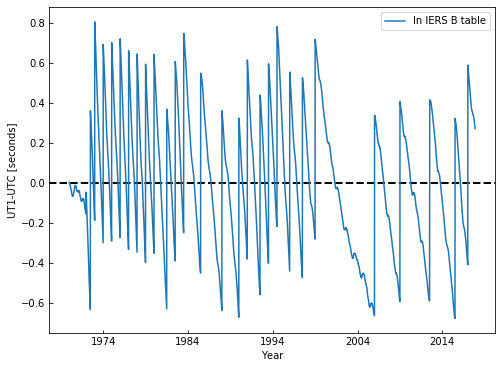

In [3]:
from astropy.time import Time, TimeDelta
import datetime
import matplotlib.pyplot as plt
dt_range = np.array([datetime.datetime(1970, 1, 1) + 
                     i*datetime.timedelta(days=3.65) for i in range(5000)])
time_range = Time(dt_range)
DUT1, success = time_range.get_delta_ut1_utc(return_status=True)
from astropy.utils.iers import FROM_IERS_B
in_table = success == FROM_IERS_B
if True: # Make a plot of the time difference
    fig, ax = plt.subplots(figsize=(8,6))
    ax.axhline(0, color='k', ls='--', lw=2)
    ax.plot_date(dt_range[in_table], DUT1[in_table], '-', label='In IERS B table')
    ax.set(xlabel='Year', ylabel='UT1-UTC [seconds]')
    ax.legend(loc='upper right')
    plt.show()

**Time Formats**

1. **Julian Date** ([JD](https://en.wikipedia.org/wiki/Julian_day)): The days since November 24, 4714 BC(Julian Day Number) and the Modified Julian Date (MJD) which started at November 17, 1858. The transform of two
        MJD = JD - 2400000.5
2. **[ISO Stardard](https://en.wikipedia.org/wiki/ISO_8601)**: like "2018-05-02T09:05:00.1234000"
3. **Fits Time Standard**: like "2018-05-02T09:05:00.123(UTC)"
4. **GPS Time**: seconds from 1980-01-06 00:00:00 UTC, including leap seconds
5. **Unix Time**: seconds from 1970-01-01 00:00:00 UTC.

**Time Formats**

There are also several ways to express time interval, the most commonly used one as follows:
1. Julian date ([JD](https://en.wikipedia.org/wiki/Julian_day)): The days since November 24, 4714 BC(Julian Day Number) and the Modified Julian Date (MJD) which started at November 17, 1858. The transform of two
        MJD = JD - 2400000.5
2. [ISO Stardard](https://en.wikipedia.org/wiki/ISO_8601), like: "2018-05-02T09:05:00.1234000"
3. Fits Time Standard, contain the Time Standard at end of ISO, like: "2018-05-02T09:05:00.123(UTC)"
4. GPS Time, seconds from 1980-01-06 00:00:00 UTC, including leap seconds
5. Unix Time, seconds from 1970-01-01 00:00:00 UTC. Compasation time not by leap second but jumps backward 1 second at midnight on leap second days.

**Time Synchronization**:
- [NTP](https://en.wikipedia.org/wiki/Network_Time_Protocol): Network Time Protoocal

In [16]:
from astropy.time import Time
t1 = Time('2018-05-02T09:05:00.1234000')
print("JD: {}".format(t1.jd))
print("MJD: {}".format(t1.mjd))
print("ISO: {}".format(t1.iso))
print("ISOT: {}".format(t1.isot))
print("FITS: {}".format(t1.fits))
print("GPS: {}".format(t1.gps))
print("Unix: {}".format(t1.unix))

JD: 2458240.8784736507
MJD: 58240.37847365046
ISO: 2018-05-02 09:05:00.123
ISOT: 2018-05-02T09:05:00.123
FITS: 2018-05-02T09:05:00.123(UTC)
GPS: 1209287118.1234002
Unix: 1525251900.1234002


### Celestial Coordinate System

- FK5: Fifth Fundamental Catalogue
- ICRS: International Celestial Reference System
- Galactic: Galactic System
- AltAz: Altitude-Azimuth 

**related software**: SOFA

FK5(Fifth Fundamental Catalogue by Fricke1988): A catalog of 1535 bright with magnitude brighrer than 7.5 and 3117 additional fainter stars(to magnitude 9.5), published in 1988 with uncertainty about 30-40 milliararcsecond at that time, but become worse today. FK5 was the successor of the FK4 and FK3.

ICRS(International Celestial Reference System): It's International Astronomical Union(IAU) standard, a reference system keeping updated with time. First apposed in 1997 with the first International Celestial Reference Frame(ICRF1), using 212 VLBI radio source as a Reference with a typical error about 0.02 milliarcseconds, updated 2006 and next update planed in this year(2018).

Galactic System: The galactic coordinate system uses the approximate plane of our galaxy as its fundamental plane. The solar system is still the center of the coordinate system, and the zero point is defined as the direction towards the galactic center.

AltAz(Altitude Azimuth): Also called horizontal system, it is based on the position of the observer on Earth, which revolves around its own axis once per sidereal day (23 hours, 56 minutes and 4.091 seconds) in relation to the star background.

See more details go to [wiki](https://en.wikipedia.org/wiki/Celestial_coordinate_system)

In [17]:
from astropy import coordinates
from astropy import units as u
from astropy.coordinates import SkyCoord

# Define coordinates
c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

c.dec.degree
c.to_string('hmsdms') # available string formates: hmsdms,dms,decimal

'00h42m30s +41d12m00s'

In [18]:
# Frame Transformation
c_icrs = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, frame='icrs')
print(c_icrs.galactic)
print(c_icrs.fk5)
print(c_icrs.transform_to('fk5'))

<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>
<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (10.68459154, 41.26917146)>
<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (10.68459154, 41.26917146)>


In [19]:
# define Skycoord and frame transformation
gc = SkyCoord(l=0*u.degree, b=45*u.degree, frame='galactic')
fk = SkyCoord(ra=1.0, dec=2.0, unit='deg', frame='fk5', equinox='J1975.0')
gc.transform_to(fk).transform_to(gc)

<SkyCoord (Galactic): (l, b) in deg
    (360., 45.)>

In [20]:
# cross-matching
from astropy.coordinates import SkyCoord
from astropy import units as u
from random import random
ra_real = np.random.rand(10)*360
dec_real = (np.random.rand(10)-0.5)*90
catalog = SkyCoord(ra=ra_real*u.degree, dec=dec_real*u.degree)
obs_obj = [1,5,3,2,6,7,9,4,8,0,8,8]
ra_obs = (ra_real + np.random.rand(ra_real.shape[0])/3600)[obs_obj]
dec_obs = (dec_real + np.random.rand(dec_real.shape[0])/3600)[obs_obj]
c = SkyCoord(ra=ra_obs*u.degree, dec=dec_obs*u.degree)  
idx, d2d, d3d = c.match_to_catalog_sky(catalog)
print(idx, d2d)

[1 5 3 2 6 7 9 4 8 0 8 8] [0d00m00.4665s 0d00m00.9813s 0d00m00.5021s 0d00m00.2891s 0d00m00.342s
 0d00m00.69s 0d00m01.1559s 0d00m00.7286s 0d00m00.6407s 0d00m00.1362s
 0d00m00.6407s 0d00m00.6407s]


In [21]:
# deal with velocity
from astropy.coordinates import SkyCoord
import astropy.units as u
sc = SkyCoord(1*u.deg, 2*u.deg, pm_ra_cosdec=.2*u.mas/u.yr, 
              pm_dec=.1*u.mas/u.yr)
sc.galactic

<SkyCoord (Galactic): (l, b) in deg
    (99.63785528, -58.70969293)
 (pm_l_cosb, pm_b) in mas / yr
    (0.22240398, 0.02316181)>

All the demonstration above using the `SkyCoord` class, it's high level class designed for easy usage. However, if you want more advanced option, you can use many basic coordinate system in `astropy.coordiantes`, or define your own representation coordinates, see more [here](http://docs.astropy.org/en/stable/coordinates/frames.html#defining-a-new-frame). 

In [22]:
# high level class
from astropy.coordinates import SkyCoord  # High-level coordinates
# low level class
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles

ra = Longitude([1, 2, 3], unit=u.deg)  # Could also use Angle
dec = np.array([4.5, 5.2, 6.3]) * u.deg
cd = ICRS(ra=ra, dec=dec)
fk5 = FK5(equinox='2011-05-15T12:13:14')
cd.transform_to(fk5)

<FK5 Coordinate (equinox=2011-05-15T12:13:14.000): (ra, dec) in deg
    [(1.14574221, 4.56327536), (2.14585797, 5.26324493),
     (3.14602494, 6.36319523)]>

**World Coodinate Sysrem(WCSs)**:

Representations of the mapping between image coordinates and physical(i.e. world) coordinate system, presented within FITS HDUs

**WCS Standard**

- NAXIS: number of axies
- NAXISj: image array data length on axis j
- CRPIXj: pixel coordiantes referrence point
- PCi_j: the transform matrix of each pixel
- CDELTi: contain scale factor
- CDi_j: the products of PCi_j $\times$ CDELTi
- CRVALj: world coordinates reference point
- CTYPEi: computing methord to scale the pixel coordinates into real physical coordinates
- PVi_m: contains numerical parameters if CTYPEi is non-linear method, or named "PSi_m" if it's character valued

See [Official Fits Standard](https://fits.gsfc.nasa.gov/fits_standard.html) for more detail

![wcs](figures/wcs.png)

In [25]:
from astropy.io import fits
from astropy.wcs import WCS
filename = 'data/HorseHead.fits'
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

In [26]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.59941666666666  -4.946638888888889  
CRPIX : -716.333144294269  -8444.64946698226  
PC1_1 PC1_2  : 0.015029018460682027  -9.63735777657198e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893

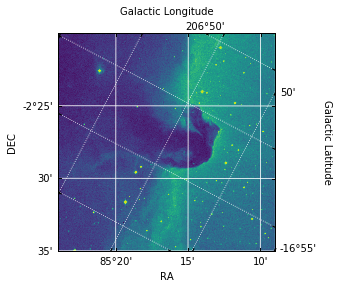

In [4]:
# show how to use the WCS
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename

filename = 'data/HorseHead.fits'
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs)
if True: #axis plots
    ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
    ax.coords.grid(True, color='white', ls='solid')
    ax.coords[0].set_axislabel('RA')
    ax.coords[1].set_axislabel('DEC')
    # add he overlay axis
    overlay = ax.get_coords_overlay('galactic')
    overlay.grid(color='white', ls='dotted')
    overlay[0].set_axislabel('Galactic Longitude')
    overlay[1].set_axislabel('Galactic Latitude')

## Input and Output
1. Read data from files
2. Write data to files

Input and Output are the most basic step for astronomy data analysis. In Astropy it's contained in: `astropy.io` and `astropy.table`. `io` sub-package contains many functions to read different formated file, while `table` introduce a high level data structure call "Table" which is very similar to "DataFrame" of [Pandas](https://pandas.pydata.org/).

### Read Data from Files

In [28]:
from astropy.table import Table
### reading
data1 = Table.read('data/data1.dat',
                    format='ascii')
print(data1)

 target V_mag
------- -----
NGC1001  11.1
NGC1002  12.3
NGC1003  15.2


In [29]:
%cat data/data1.dat

target V_mag
NGC1001 11.1
NGC1002 12.3
NGC1003 15.2


In [31]:
data1['target']

NGC1001
NGC1002
NGC1003


![](figures/table_format.png)
For more details see [this](http://docs.astropy.org/en/stable/io/unified.html#built-in-table-readers-writers).

In [32]:
from astropy import io
f1 = io.fits.open('data/HorseHead.fits')
f1.info()

Filename: data/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [85]:
f1[1].data

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ..., -0.01591257,
        -0.00503742, -0.02300435],
       [        nan,         nan,         nan, ...,  0.01447967,
         0.00649865,  0.01832626],
       [        nan,         nan,         nan, ...,  0.0126287 ,
        -0.00901988,  0.03156416]], dtype=float32)

A useful command line tools `showtable`

In [33]:
!showtable data/HorseHead.fits --hdu 'er.mask'

   XI     ETA   XI_CORR ETA_CORR
DEGREES DEGREES  ARCSEC  ARCSEC 
------- ------- ------- --------
  -3.12   -3.12    0.09     0.04
  -2.96   -3.12    0.02     0.07
   -2.8   -3.12   -0.07     0.15
  -2.64   -3.12   -0.17     0.25
  -2.48   -3.12   -0.29     0.26
  -2.32   -3.12   -0.38     0.25
    ...     ...     ...      ...
   2.16    3.12    0.42     -0.2
   2.32    3.12    0.35    -0.26
   2.48    3.12    0.26    -0.33
   2.64    3.12     0.1    -0.38
    2.8    3.12     0.0      0.0
   2.96    3.12     0.0      0.0
   3.12    3.12     0.0      0.0
Length = 1600 rows


### Write Data to Files

Following contains the basic usages of writing your own fits files, it really easy using Astropy.

In [10]:
# how to write a fits file, contains primary table
from astropy.io import fits
import numpy as np
# fits Header
hdr = fits.Header()
hdr['OBSERVER'] = 'Your name'
hdr['COMMENT'] = "Here's some comments about this FITS file."
data = np.diag([1,2,3,4])
primary_hdu = fits.PrimaryHDU(data ,header=hdr)
primary_hdu.writeto('data/primary.fits')

In [3]:
# write BinTable data, it's must be column organised data
c1 = fits.Column(name='a', array=np.array([1, 2]), format='K')
c2 = fits.Column(name='b', array=np.array([4, 5]), format='K')
c3 = fits.Column(name='c', array=np.array([7, 8]), format='K')
t = fits.BinTableHDU.from_columns([c1, c2, c3])
t.writeto('data/table2.fits', overwrite=True)

In [4]:
# wite a fits file contains serveral table
hdr = fits.Header()
hdr['OBSERVER'] = 'Your name'
hdr['COMMENT'] = "Here's some comments about this FITS file."
primary_hdu = fits.PrimaryHDU(header=hdr)
data = np.diag([1,2,3,4])
image_hdu = fits.ImageHDU(data, name="image")
c1 = fits.Column(name='a', array=np.array([1, 2]), format='K') # double int
c2 = fits.Column(name='b', array=np.array([4, 5]), format='K') # doubel int
c3 = fits.Column(name='c', array=np.array([7., 8.]), format='D') # double float
bintable_hdu = fits.BinTableHDU.from_columns([c1, c2, c3], name='bintable')
hdus = fits.HDUList([primary_hdu, image_hdu, bintable_hdu])
hdus.writeto('data/multitable.fits', overwrite=True)

In [9]:
f = fits.open('data/multitable.fits')
f.info()

Filename: data/multitable.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  IMAGE         1 ImageHDU         8   (4, 4)   int64   
  2  BINTABLE      1 BinTableHDU     15   2R x 3C   [K, K, D]   


In [19]:
# a useful command line tool 'showtable'
!showtable data/table2.fits

 a   b   c 
--- --- ---
  1   4   7
  2   5   8


## Data Preprocessing and Statistics
1. Convolution
2. Statistics

I put the `astropy.convolution` and `astropy.stats` into this section, there are not so many  functions for general data analysis and statistics, but do have something that critical to astronomers and researcher, but since some of them are so specialized, so I'm try to recover all of them, but just focus on two simple examples.

### Convolution

So what the convolution do?
1. Smooth data
2. flag out bad pixel
3. construct sampled image with discrete data

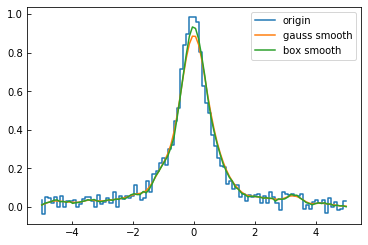

In [5]:
# use covolution to smooth data -- 1D data
import numpy as np
from astropy.modeling.models import Lorentz1D
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
lorentz = Lorentz1D(1, 0, 1)
x = np.linspace(-5, 5, 100)
data_1D = lorentz(x) + 0.1 * (np.random.rand(100) - 0.5)
# smooth with guassian kernal with standard deviation equal to 2
gauss_kernel = Gaussian1DKernel(2) 
smoothed_data_gauss = convolve(data_1D, gauss_kernel)
# smooth with boxkenal with a width equal to 5
box_kernel = Box1DKernel(5)
smoothed_data_box = convolve(data_1D, box_kernel)
if True: # plot the results
    fig, ax = plt.subplots(1)
    ax.step(x, data_1D, label='origin')
    ax.plot(x, smoothed_data_gauss, label='gauss smooth')
    ax.plot(x, smoothed_data_box, label='box smooth')
    plt.legend()

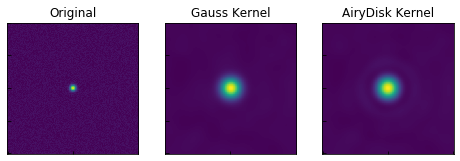

In [6]:
# 2-D convulution
import numpy as np
from astropy.convolution import convolve, Gaussian2DKernel, AiryDisk2DKernel
from astropy.modeling.models import Gaussian2D
gauss = Gaussian2D(10, 0, 0, 3, 3)
# Fake image data including noise
x = np.arange(-100, 101)
y = np.arange(-100, 101)
x, y = np.meshgrid(x, y)
data_2D = gauss(x, y) + 0.5 * (np.random.rand(201, 201) - 0.5)
# convolute with gauss kernal
gauss_kernel = Gaussian2DKernel(10)
smoothed_data_gauss = convolve(data_2D, gauss_kernel)
# convolute with AiryDisk kernal
airydisk_kernel = AiryDisk2DKernel(30)
smoothed_data_airydisk = convolve(data_2D, airydisk_kernel)
if True: # plots
    fig, ax = plt.subplots(1,3, figsize=(8,3))
    ax[0].imshow(data_2D)
    ax[0].set_title('Original')
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])
    ax[1].imshow(smoothed_data_gauss)
    ax[1].set_title('Gauss Kernel')
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])
    ax[2].imshow(smoothed_data_airydisk)
    ax[2].set_title('AiryDisk Kernel')
    ax[2].set_xticklabels([])
    ax[2].set_yticklabels([])

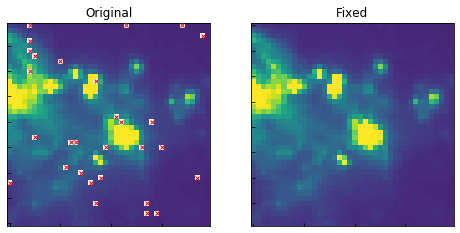

In [7]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans

hdu = fits.open('data/gc_msx_e.fits')[0]
img = hdu.data[50:90, 60:100] * 1e5

indices = np.random.randint(low=0, high=img.size, size=30)
img.flat[indices] = np.nan # add random bad pixels

# smooth with a Gaussian kernel, it's default is a 8x8 array
kernel = Gaussian2DKernel(x_stddev=1)

# replace nans by interpolated values nearby
fixed_image = interpolate_replace_nans(img, kernel)

if True: #plots
    plt.figure(1, figsize=(8, 6))
    ax1 = plt.subplot(121)
    im = ax1.imshow(img, vmin=-2., vmax=2.e1, origin='lower',
                    interpolation='nearest', cmap='viridis')
    y, x = np.where(np.isnan(img))
    ax1.set_autoscale_on(False)
    ax1.plot(x, y, 'rx', markersize=4)
    ax1.set_title("Original")
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    ax2 = plt.subplot(122)
    im = ax2.imshow(np.flipud(fixed_image), vmin=-2., vmax=2.e1)
    ax2.set_title("Fixed")
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

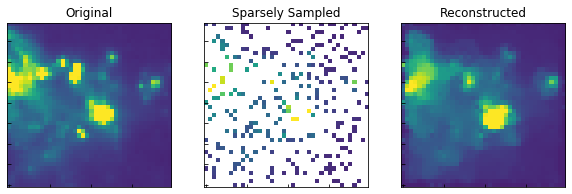

In [8]:
from astropy.io import fits
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans

hdu = fits.open('data/gc_msx_e.fits')[0]
img = hdu.data[50:90, 60:100] * 1e5

indices = np.random.randint(low=0, high=img.size, size=300)
sampled_data = img.flat[indices]

# sparsely sampled data of the original image
new_img = np.tile(np.nan, img.shape)
new_img.flat[indices] = sampled_data

kernel = Gaussian2DKernel(x_stddev=1)
reconstructed_image = interpolate_replace_nans(new_img, kernel)

if True: # do the plots
    plt.figure(1, figsize=(10, 8))
    ax1 = plt.subplot(1, 3, 1)
    im = ax1.imshow(img, vmin=-2., vmax=2.e1, origin='lower',
                    interpolation='nearest', cmap='viridis')
    y, x = np.where(np.isnan(img))
    ax1.set_autoscale_on(False)
    ax1.set_title("Original")
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    ax2 = plt.subplot(1, 3, 2)
    im = ax2.imshow(new_img, vmin=-2., vmax=2.e1, origin='lower',
                    interpolation='nearest', cmap='viridis')
    ax2.set_title("Sparsely Sampled")
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

    ax2 = plt.subplot(1, 3, 3)
    im = ax2.imshow(reconstructed_image, vmin=-2., vmax=2.e1, origin='lower',
                    interpolation='nearest', cmap='viridis')
    ax2.set_title("Reconstructed")
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

here, we use the `convolve`, there is still another function called `convolve_fft` who use fast Fourier to do transformation, which is much faster when deal with a little larger Kernels.

**Available Buildin Kernels**
![](figures/kernels.png)
see more detail description see [Available Kernels](http://docs.astropy.org/en/stable/convolution/kernels.html#available-kernels)

### Statistics
- **Circular Statistics**: Circular statistics deals with observations on compact Riemannian manifolds. this sub-package functions used in circular statistics, like mean, correlation coefficient, standard deviation and so on, also also cover tests of uniformity like Rayleigh and V tests
- **Lomb-Scargle Periodogram**: a commonly-used statistical tool to detect periodic signals in unevenly-spaced observation
- **Ripley's K Function Estimators**: a type of estimator used to characterize the correlation of such spatial point processes, describes correlation among objects in a given field, a test about the lumpiness about the universe.

In [44]:
# sigma clip
from astropy import stats
data = [1, 5, 6, 8, 100, 5, 3, 2]
stats.sigma_clip(data, sigma=2, iters=5)

masked_array(data=[1, 5, 6, 8, --, 5, 3, 2],
             mask=[False, False, False, False,  True, False, False, False],
       fill_value=999999)

Exmaple of Lomb-Scargle Periodogram:

[Lincoln Near-Earth Asteroid Research asteroid survey](https://www.ll.mit.edu/mission/space/linear/) (LINEAR, 1998-2013), cover approximately 10,000 deg2 of the northern sky. Because of it's good sensitivity and wide-field-of-view made it suitable for variable and transient objects. 

Following is a vaiable star named "LINEAR_1137594", we can use `LombScargle` algrithm to find out it's most likely variability period. Data and figures adapted from https://arxiv.org/abs/1703.09824 

<ErrorbarContainer object of 3 artists>

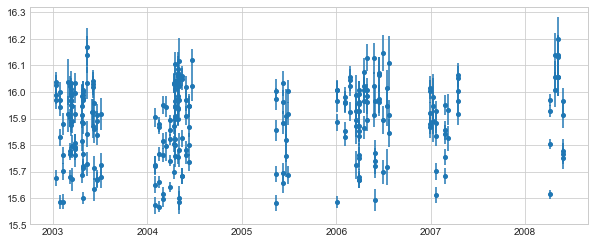

In [9]:
from astropy.table import Table
from astropy.time import Time
from astropy.stats import LombScargle

data = Table.read('data/LINEAR_11375941.csv', format='csv')
t = Time(data['t'], format='mjd')
t.format = 'iso'

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,4))
ax = plt.subplot(111)
# show the original data
ax.errorbar(t.datetime.astype('O'), data['mag'], yerr=data['magerr'], marker='o', markersize=4, linestyle='None')


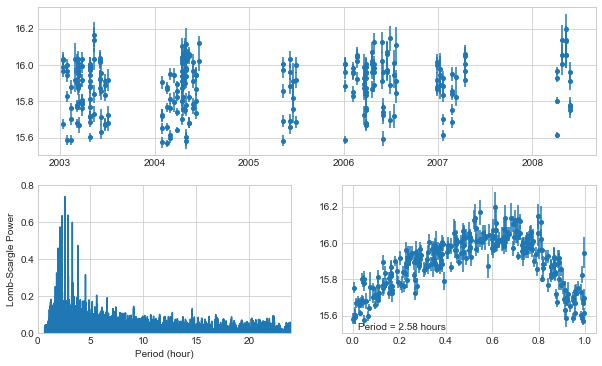

In [10]:
# calculate Lomb-Scargle Periodogram
frequency, power = LombScargle(data['t'], data['mag'], data['magerr']).autopower(nyquist_factor=500, minimum_frequency=0.2)
period_hours = 1. / frequency * 24
best_period = period_hours[np.argmax(power)]
if True: #plots
    fig = plt.figure(figsize=(10, 6))
    ax0 = plt.subplot(211)
    # show the original data
    ax0.errorbar(t.datetime.astype('O'), data['mag'], yerr=data['magerr'], marker='o', markersize=4, linestyle='None')
    ax1 = plt.subplot(223)
    ax2 = plt.subplot(224)
    ax1.set(xlim=(0, 24), ylim=(0, 0.8), xlabel='Period (hour)', ylabel='Lomb-Scargle Power')
    ax1.plot(period_hours, power)
    # fold the observed data of the best period
    phase = (data['t']/ (best_period/24.)) % 1 # data['t'] is formated as mjd, with unit of day
    ax2.errorbar(phase, data['mag'], yerr=data['magerr'], marker='o', markersize=4, linestyle='None')
    ax2.text(0.02, 15.52, "Period = {0:.2f} hours".format(best_period))

## Modeling and Fitting
1. Cosmological models
2. Model fitting

Cosmological Model:

`astropy.cosmology` contains several dark energy model, currently, data from Planck and WMAP all support the flat universe, so the `FlatLamdaCDM` always the recommend one, which also assume the dark energy of our universe is a constant, besides it, `LamdaCDM` allows for spatial curvature of universe, `wCDM` assume a constant dark energy equation of state parameterized by $w_0$ and it's modified ones, after you defined the cosmology model, you can easily get distance, ages, lookback times and distance separatiomn when you get the redshift of the objects.

if you do some research on Cosmology itself, the cosmology package also provide some convinience for you, you can modify lots of parameters of a given cosmology
```python
from astropy.cosmology import LambdaCDM
import astropy.units as u
cosmo = LambdaCDM(H0=70, Ode0=0.7, Om0=0.26, Ob0=0.04, Tcmb0=3.02, 
                      Neff=3.15, m_nu=[0, 0, 0]*u.eV, name='mCDM')
```
all the paremeter end with 0 stands for the paremeter value at z=0, others: 
 
    'Om': Omega matter fraction
    'Ob': Omega baryons fraction
    'Tcmb': Cosmic Microwave Background temperature
    'Neff': Number of Neutrino species
    'm_nu': Mass of each neutrino species
    'name': your Cosmology name
of course, if you based on `wCDM`, you can also specify $w_0$

### Cosmological Models

![buildin cosmological models](figures/buildn_cosmology.png)

In [47]:
# use the Planck15 results
from astropy.cosmology import Planck15 as cosmo
cosmo

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)

In [48]:
cosmo.H0

<Quantity 67.74 km / (Mpc s)>

In [49]:
# self-define a oosmology
from astropy.cosmology import LambdaCDM
import astropy.units as u
cosmo = LambdaCDM(H0=70, Ode0=0.7, Om0=0.26, Ob0=0.04, Tcmb0=3.02, 
                      Neff=3, m_nu=[0., 0., 0.]*u.eV, name='MCDM')
print(cosmo)

LambdaCDM(name="MCDM", H0=70 km / (Mpc s), Om0=0.26, Ode0=0.7, Tcmb0=3.02 K, Neff=3, m_nu=[0. 0. 0.] eV, Ob0=0.04)


### Model Fitting

`astropy.modeling` contains many models and fitting algorithms to help modeling many astronomical signals, including 1D data or 2D data.

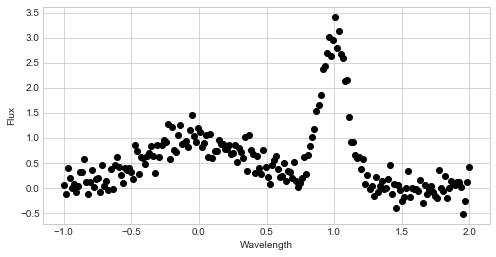

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models

# Generate fake data
np.random.seed(502)
g1 = models.Gaussian1D(1, 0, 0.4)
g2 = models.Gaussian1D(3, 1., 0.1)
x = np.linspace(-1, 2, 200)
y = g1(x) + g2(x) + np.random.normal(0., 0.2, x.shape)
if True: # Plot the data
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(8,4))
    plt.plot(x, y, 'ko')
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')

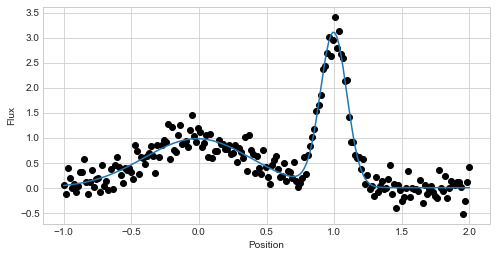

In [12]:
from astropy.modeling.models import Gaussian1D
from astropy.modeling import fitting

TwoGaussians = Gaussian1D + Gaussian1D
# get the initial guess
gg_init = TwoGaussians(amplitude_0=1.0, mean_0=0., stddev_0=0.5,
                       amplitude_1=3.5, mean_1=1., stddev_1=0.2)
# use LevMarLSQFitter do the fitting
fitter = fitting.LevMarLSQFitter()
gg_fit = fitter(gg_init, x, y)
if True: #plots
    plt.figure(figsize=(8,4))
    plt.plot(x, y, 'ko')
    plt.plot(x, gg_fit(x))
    plt.xlabel('Position')
    plt.ylabel('Flux')

In [52]:
gg_fit

<CompoundModel0(amplitude_0=0.97904872, mean_0=-0.01272131, stddev_0=0.39519978, amplitude_1=3.07236787, mean_1=0.9961445, stddev_1=0.09731905)>

** Main Components of Astropy **
- Data Type
- I/O and Data Structure
- Data Preprocessing and Statistics
- Modeling and Fitting

# a little more...

## Plan an observation

In [13]:
# Define the targets
from astropy.coordinates import SkyCoord
from astropy import units as u
virgo = SkyCoord('12h27m0s', '+12d43m0s', frame='icrs') #Virgo Cluster
MaNGA_8335_6101 = SkyCoord(215.229240711*u.deg, 40.1210273909*u.deg, frame='icrs')

Since it's near summer, so the best target object at night may the [Virgo Cluster](https://en.wikipedia.org/wiki/Virgo_Cluster), it position can be got from the [wikipage](https://en.wikipedia.org/wiki/Virgo_Cluster), which is encoded above. The another target ['MaNGA 8335-6101'](http://skyserver.sdss.org/dr14/en/tools/chart/navi.aspx?ra=215.229240711&dec=40.1210273909&opt=GS&scale=0.2), which choose it? Just because my good friend Songlin is working on this object, it's a interesting galaxy with a [major merger process](https://en.wikipedia.org/wiki/Galaxy_merger), so there are two disk in this galaxy one outside one at most inner region, for more details about it, you can refer to the paper(not available yet).

In [14]:
# Define the observatory
from astropy.coordinates import EarthLocation
from astropy import units as u
# location of ZDJ Observatory
obs_loc = EarthLocation(lat=32.1218*u.deg, lon=118.96097*u.deg, height=39*u.m)

In [15]:
# Define observational time
from astropy.time import Time
utc_offset = +8*u.hour
obs_time = Time('2018-05-02 19:00') - utc_offset

After choosing the targets, we need also define our observe site, for this demonstration I choose the observatory of our school named Zuodijiang Observatory. For your site, you can either define it like me or use the more convenient way like:
```python
APO = EarthLocation.of_site('APO')
```

## Checking best observational time

To roughly determine the best time to observe, we can plot the airmass of targets. Airmass can be estimated using the secant of the observed light, which can be get from the `AltAz.secz` method.

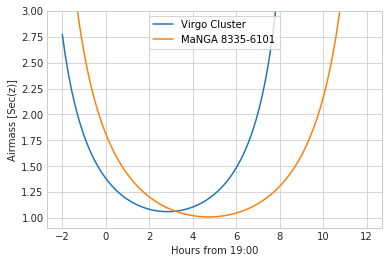

In [16]:
from astropy.coordinates import AltAz
# define the observation time
delta_hours = np.linspace(-2, 12, 100)*u.hour
obstimes = obs_time + delta_hours
# observertory
altaz_frames = AltAz(location=obs_loc, obstime=obstimes)
# targets
virgo_altaz = virgo.transform_to(altaz_frames)
MaNGA_altaz = MaNGA_8335_6101.transform_to(altaz_frames)
if True: #plots
    plt.plot(delta_hours, np.ma.masked_less(virgo_altaz.secz,0), label='Virgo Cluster')
    plt.plot(delta_hours, np.ma.masked_less(MaNGA_altaz.secz,0), label='MaNGA 8335-6101')
    plt.style.use('default')
    plt.xlabel('Hours from 19:00')
    plt.ylabel('Airmass [Sec(z)]')
    plt.ylim(0.9, 3)
    plt.legend()

After ensuring the possibility to observe, you can check more rigorously but taking account of Sun and Moon, as it's not exactly nighttime when Sun below the horizon and we should also avoid the bright Moon. Following, we define dusk at the altitude of sun between 0 ~ -18°, it's not a good time for scientific observation but good time for taking the flat field.

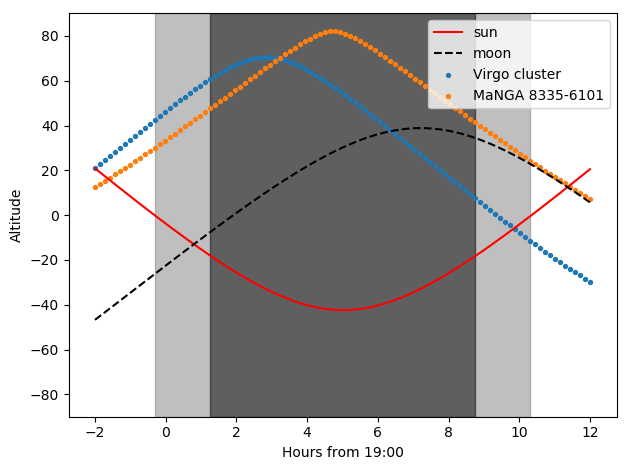

In [17]:
from astropy.coordinates import get_sun
from astropy.coordinates import get_moon
# get position of sun and moon
sun = get_sun(obstimes).transform_to(altaz_frames)
moon = get_moon(obstimes).transform_to(altaz_frames)
if True: # plots
    plt.scatter(delta_hours, virgo_altaz.alt, label='Virgo cluster', s=8)
    plt.scatter(delta_hours, MaNGA_altaz.alt, label='MaNGA 8335-6101', s=8)

    plt.plot(delta_hours, sun.alt, 'r', label='sun')
    plt.plot(delta_hours, moon.alt, 'k--', label='moon')

    plt.fill_between(delta_hours.to('hr').value, -90, 90, sun.alt < -0*u.deg, 
                     color='0.5', zorder=0, alpha=0.5)
    plt.fill_between(delta_hours.to('hr').value, -90, 90, sun.alt < -18*u.deg, 
                     color='k', zorder=0, alpha=0.5)
    plt.xlabel('Hours from 19:00')
    plt.ylabel('Altitude')
    plt.ylim(-90, 90)
    plt.legend(loc='upper right')
    plt.tight_layout()

It's great if your interested target can be observed at your observatory, if you want to get a more vivid demonstration of your observation, you can considering the Astropy affiliated package [astroplan](https://github.com/astropy/astroplan). Following is a simple example same as the one we showed above, but more user friendly.

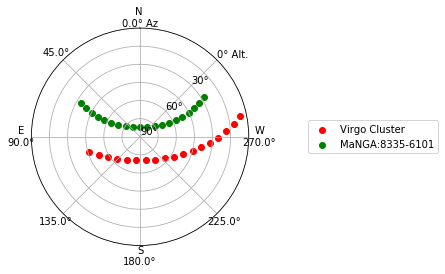

In [11]:
# visualiziation using astroplan
from astropy.coordinates import EarthLocation, get_moon, SkyCoord
from astropy.time import Time
from astropy import units as u
from astroplan import Observer, FixedTarget
from astroplan.plots import plot_sky
import matplotlib.pyplot as plt  

# define the coodinate of targets
virgo = SkyCoord('12h27m0s', '+12d43m0s', frame='icrs')
MaNGA_8335_6101 = SkyCoord(215.229240711*u.deg, 40.1210273909*u.deg, frame='icrs')
plan1 = FixedTarget(name='Virgo Cluster', coord=virgo)
plan2 = FixedTarget(name='MaNGA:8335-6101', coord=MaNGA_8335_6101)
# observertory
obs_loc = EarthLocation(lat=32.1218*u.deg, lon=118.96097*u.deg, height=39*u.m)
plan_site = Observer(location=obs_loc, name="ZDJO", timezone="Asia/Shanghai")

# define time window
obs_time = Time('2018-05-02 19:00') - 8*u.hour # also need minus the time offset
start = obs_time
end = obs_time + 10*u.hour
time_window = start + (end - start) * np.linspace(0, 1, 20)

plot_sky(plan1, plan_site, time_window, style_kwargs={'color': 'r'})
plot_sky(plan2, plan_site, time_window, style_kwargs={'color': 'g'})

# uncomment below to get the position of moon. 
# It seems the astroplan not support the NonFixedTarget, so there is something wrong the legend
#moon = get_moon(time_window)
#plot_sky(moon, plan_site, time_window, style_kwargs={'color': 'b', 'alpha': 0.2})

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))  
plt.show() 

In [ ]:
# you can also get the luminosity of the moon
from astroplan import moon_illumination
ml = moon_illumination(time_window)
print(ml)

## Do some preliminary investigation

So, tonight, it's a good time to do observation of our tow targets, so what we can check before? If you know your science goal, that great. If not, you can check how many past observation have done of your target, so, here comes the good affiliated tools -- [astroquery](https://github.com/astropy/astroquery). It wrapped many on-line database APIs, to help you get the archive data or proprietary data more easily. For scientific instructions, lets first investigate "MaNGA 8335-6101".

So let's first look how 'MaNGA 8335-6101' looks like

In [ ]:
# get the image from SDSS
# here I not use astroquery, I get some wrong with it
from urllib.parse import urlencode
from urllib.request import urlretrieve
tg = SkyCoord(215.229240711*u.deg, 40.1210273909*u.deg, frame='icrs') # MaNGA 8335-6101 
impix = 2024
imsize = 2*u.arcsec
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=tg.ra.deg, dec=tg.dec.deg, width=impix, height=impix, 
                              scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string
# this downloads the image to your disk
urlretrieve(url, 'figures/MaNGA-8335-6101.jpg')
sdss_img = imread('figures/MaNGA-8335-6101.jpg')
imshow(sdss_img)

In [ ]:
imshow(sdss_img[:, :, 1], cmap='Greys')
colorbar()

In [ ]:
from astropy.modeling.models import Sersic2D
from astropy.modeling import fitting

fit_p = fitting.LevMarLSQFitter()
x, y = np.meshgrid(np.arange(2024), np.arange(2024))
z = sdss_img[:,:,1]
p_init = Sersic2D(amplitude = 240, r_eff = 250, n=3, x_0=1012, y_0=1012,
               ellip=-0.3, theta=0)
p = fit_p(p_init, x, y, z)
print(p.n)
if True: #plots
    fig = plt.figure(figsize=(10, 4))
    ax1 = plt.subplot(1, 3, 1)
    ax1.imshow(z, origin='lower', vmin=-1e2, vmax=2e2)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_title("Data")
    ax2 = plt.subplot(1, 3, 2)
    ax2.imshow(p(x, y), origin='lower', vmin=-1e2, vmax=2e2)
    ax2.set_title("Model")
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    ax3 = plt.subplot(1, 3, 3)
    ax3.imshow(z - p(x, y), origin='lower', vmin=-1e2,vmax=2e2)
    ax3.set_title("Residual")
    ax3.set_xticklabels([])
    ax3.set_yticklabels([])

In [63]:
# using the SDSS archive data to do some pre-
from astropy import units as u
from astroquery.sdss import SDSS
from astropy.coordinates import SkyCoord

MaNGA_8335_6101 = SkyCoord(215.229240711*u.deg, 40.1210273909*u.deg, frame='icrs')
# SDSS.query_region default searching within a 5 arcsecond radius for optical counterparts
xid = SDSS.query_region(MaNGA_8335_6101, spectro=True)

xid

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,bytes4
215.229229002893,40.1210254589867,1237661871876603967,3818,301,2,320,0.01754213,1348,53084,217,1517772774670624768,26,SDSS


In [ ]:
# I have plan to use the astroquery to get the g,r,i band data to constract the image but failed
# but now moved this to M87 using HST data
im = SDSS.get_images(MaNGA_8335_6101, matches=xid, band=['g','r','i'], radius=1*u.arcsec, cache=False)

imshow(ma.masked_greater(im[2][0].data, 1))

In [65]:
sp = SDSS.get_spectra(MaNGA_8335_6101)
sp

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1829b99da0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1829ba4b70>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1829bbf9b0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1829bd2438>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1829be50f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1829bf5b00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1829c0e550>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x182b0cdf60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x182b0e79b0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x182b0ff400>]]

In [66]:
sp[0].info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3835R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  B1-00025742-00025745-00025746    1 BinTableHDU    146   2044R x 7C   [E, E, E, J, E, E, E]   
  5  B1-00025743-00025745-00025746    1 BinTa

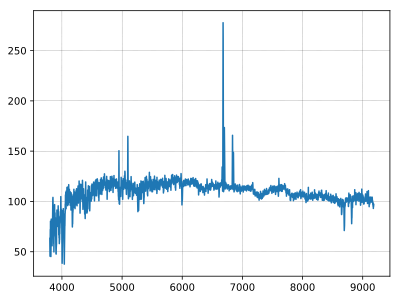

In [67]:
# show the spectra of MaNGA 8335-6101
loglam = sp[0][1].data['loglam']
flux = sp[0][1].data['flux']
flux = flux
plt.plot(10**(loglam), flux)
plt.grid(color='k', linestyle='--', linewidth=0.2)
#plt.xlim(6500,7000)

In [ ]:
wave_window = (loglam > np.log10(6650)) & (loglam < np.log10(6900))
continua = flux[(loglam > np.log10(6750)) & (loglam < np.log10(6800))].mean()
wavelength = 10**loglam[wave_window]
flux2 = flux[wave_window] - continua
flux2 = flux2/flux2.max()
plt.grid(color='k', linestyle='--', linewidth=0.2)
plt.plot(wavelength, flux2)
#xlim(3.834, 3.837)

Best fit redshift is 0.016965464484431265


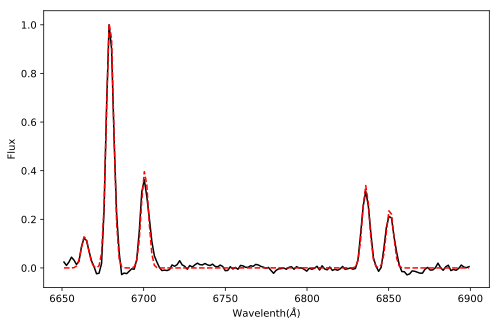

In [69]:
# we use the waverange(6500, 7000) to fits the redshift
# we know the spectrumof this range:
#    Ha: 6563
#    NII: 6548, 6584
#    SII: 6716, 6731
from astropy.modeling.models import custom_model
#from astropy.modeling.models import Gaussian1D
from astropy.modeling.fitting import LevMarLSQFitter

@custom_model
def spectra(x, z=None, sigma=None, Ha_A=None, Ha_wave=None, 
            NII_A=None, NII1_wave=None, NII2_wave=None,
            SII1_A=None, SII2_A=None, SII1_wave=None, SII2_wave=None
           ):
    x0 = x/(1+z)
    y = Ha_A*np.exp(-(x0-Ha_wave)**2/(2*sigma)) \
        + 0.33*NII_A*np.exp(-(x0-NII1_wave)**2/(2*sigma)) \
        + 1*NII_A*np.exp(-(x0-NII2_wave)**2/(2*sigma)) \
        + SII1_A*np.exp(-(x0-SII1_wave)**2/(2*sigma)) \
        + SII2_A*np.exp(-(x0-SII2_wave)**2/(2*sigma))
    return y

gg_init = spectra(z = 0.017, sigma=3., Ha_A=1.0, Ha_wave=6562.8,
                  NII_A = 0.38, NII1_wave=6548.03, NII2_wave=6583.41, 
                  SII1_A=0.3, SII2_A=0.2, 
                  SII1_wave=6716.47, SII2_wave=6730.85,
                 )

fitter = fitting.LevMarLSQFitter()
gg_fit = fitter(gg_init, wavelength, flux2)

plt.figure(figsize=(8,5))
plt.plot(wavelength, flux2, 'k-')
plt.plot(wavelength, gg_fit(wavelength),'r--')
plt.xlabel(r'Wavelenth($\AA$)')
plt.ylabel('Flux')

print("Best fit redshift is {}".format(gg_fit.z.value))

In [70]:
gg_fit

<spectra(z=0.01696546, sigma=4.56139027, Ha_A=1.04157248, Ha_wave=6567.96794311, NII_A=0.40059286, NII1_wave=6552.84372069, NII2_wave=6588.9329882, SII1_A=0.33902176, SII2_A=0.24437563, SII1_wave=6721.98106147, SII2_wave=6736.47376104)>

## If someone asks you what Astronomy is

In [1]:
from astroquery.mast import Observations
obsTable = Observations.query_criteria(dataproduct_type=['image'], 
                                       dataRights='PUBLIC',
                                       objectname="M87", obs_collection='HST')

In [72]:
print(len(obsTable))

2416


In [ ]:
# get all the available data
obsTable_select = obsTable[(obsTable['target_name']=='M87-JET') 
         #& (obsTable['instrument_name']=='WFPC2/WFC')
         & ((obsTable['wavelength_region'] == 'OPTICAL')
         | (obsTable['wavelength_region'] == 'UV'))
         & (obsTable['proposal_id'] == '10910')]
# since we want different data on different filter, so just filter out the duplicated filter
uniq, ind = np.unique(obsTable_select['filters'], return_index=True)
obsTable_select2 = obsTable_select[ind]
obsTable_select2

In [3]:
# chooseing image data from different filter: F814W, F450W, F220W
pic_urls = np.array(obsTable_select2['jpegURL'])[[2,7,3]]
obsids = np.array(obsTable_select2['obsid'])[[2,7,3]]
print(pic_urls)
print(obsids)

['mast:HST/product/j9qf11061/j9qf11061_drz.jpg'
 'mast:HST/product/j9qf11031/j9qf11031_drz.jpg'
 'mast:HST/product/j9qf11021_drz.jpg']
['2004326011' '2004326008' '2007897816']


In [75]:
dataProductsByID = Observations.get_product_list(obsids)
dataProductsByID

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid
str10,str3,str5,str9,str62,str1,str50,str9,str28,str3,str1,str6,str17,str5,str23,int64,str10
2003115867,HST,image,J9QF11FRQ,DADS FHT file - Astrometry headerlet,S,mast:HST/product/j9qf11frq/j9qf11frq_flt_hlet.fits,AUXILIARY,--,FHT,--,HST,--,10910,j9qf11frq_flt_hlet.fits,51840,2004326007
2003115867,HST,image,J9QF11FRQ,DADS FHT file - Astrometry headerlet,S,mast:HST/product/j9qf11frq/j9qf11frq_flt_hlet.fits,AUXILIARY,--,FHT,--,HST,--,10910,j9qf11frq_flt_hlet.fits,51840,2007897816
2003115867,HST,image,J9QF11FRQ,DADS SPT file - Engineering telemetry ACS/WFC3/NICMOS/COS/STIS,S,mast:HST/product/j9qf11frq/j9qf11frq_spt.fits,AUXILIARY,--,SPT,--,HST,--,10910,j9qf11frq_spt.fits,57600,2004326007
2003115867,HST,image,J9QF11FRQ,DADS SPT file - Engineering telemetry ACS/WFC3/NICMOS/COS/STIS,S,mast:HST/product/j9qf11frq/j9qf11frq_spt.fits,AUXILIARY,--,SPT,--,HST,--,10910,j9qf11frq_spt.fits,57600,2007897816
2003115867,HST,image,J9QF11FRQ,DADS TRL file - Processing log,S,mast:HST/product/j9qf11frq/j9qf11frq_trl.fits,AUXILIARY,--,TRL,--,HST,--,10910,j9qf11frq_trl.fits,37440,2004326007
2003115867,HST,image,J9QF11FRQ,DADS TRL file - Processing log,S,mast:HST/product/j9qf11frq/j9qf11frq_trl.fits,AUXILIARY,--,TRL,--,HST,--,10910,j9qf11frq_trl.fits,37440,2007897816
2003115867,HST,image,J9QF11FRQ,DADS ASN file - Association ACS/WFC3/STIS,S,mast:HST/product/j9qf11frq/j9qf11020_asn.fits,AUXILIARY,--,ASN,--,HST,--,10910,j9qf11020_asn.fits,11520,2004326007
2003115867,HST,image,J9QF11FRQ,DADS ASN file - Association ACS/WFC3/STIS,S,mast:HST/product/j9qf11frq/j9qf11020_asn.fits,AUXILIARY,--,ASN,--,HST,--,10910,j9qf11020_asn.fits,11520,2007897816
2003115867,HST,image,J9QF11FRQ,DADS RAW file - Raw exposure COS/NICMOS/STIS/WFC3/ACS,S,mast:HST/product/j9qf11frq/j9qf11frq_raw.fits,SCIENCE,--,RAW,--,HST,--,10910,j9qf11frq_raw.fits,2255040,2004326007


In [76]:
manifest = Observations.download_products(obsids, mrp_only=True, productType="SCIENCE", download_dir='data/')

INFO: Found cached file data/mastDownload/HST/J9QF11061/j9qf11061_drz.fits with expected size 15989760. [astroquery.query]
INFO: Found cached file data/mastDownload/HST/J9QF11031/j9qf11031_drz.fits with expected size 15989760. [astroquery.query]
INFO: Found cached file data/mastDownload/HST/j9qf11020/j9qf11021_drz.fits with expected size 15989760. [astroquery.query]


In [ ]:
# look the imformation of the fits file
f1 = fits.open('data/mastDownload/HST/j9qf11020/j9qf11021_drz.fits')
f1.info()

In [ ]:
# try to plot the image in the fits file
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

hdu = f1[1]
wcs = WCS(hdu.header)
data = np.ma.masked_invalid(hdu.data)
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(np.ma.masked_greater(data, 0.5), origin='lower')
#ax.coords.grid(True, color='white', ls='solid')
ax.coords[0].set_axislabel('RA')
ax.coords[1].set_axislabel('DEC')

In [79]:
# for demo purpose, show the image of different band, recieve picture from server
from urllib.request import urlretrieve
base_url = 'https://mast.stsci.edu/api/v0/download/file?uri='
pic_files = []
for pic in pic_urls:
    url = base_url + pic
    dst = '/tmp/'+ pic.split('/')[-1]
    print(url, dst)
    urlretrieve(url, dst)
    pic_files.append(dst)

https://mast.stsci.edu/api/v0/download/file?uri=mast:HST/product/j9qf11061/j9qf11061_drz.jpg /tmp/j9qf11061_drz.jpg
https://mast.stsci.edu/api/v0/download/file?uri=mast:HST/product/j9qf11031/j9qf11031_drz.jpg /tmp/j9qf11031_drz.jpg
https://mast.stsci.edu/api/v0/download/file?uri=mast:HST/product/j9qf11021_drz.jpg /tmp/j9qf11021_drz.jpg


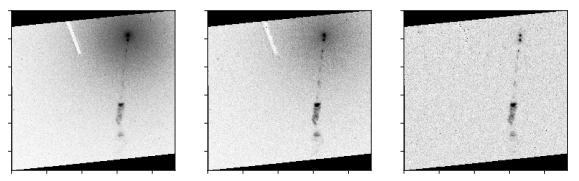

In [80]:
# show the figure of the chosen three band
fig, ax = plt.a=subplots(nrows=1, ncols=len(pic_files), figsize=(10,4))
for i in range(len(pic_files)):
    im = imread(pic_files[i])
    ax[i].imshow(im, cmap='Greys')
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
plt.show()

In [ ]:
import aplpy

aplpy.make_rgb_image([
    './data/mastDownload/HST/J9QF11061/j9qf11061_drz.fits', # F814W
    './data/mastDownload/HST/J9QF11031/j9qf11031_drz.fits', # F450W
    './data/mastDownload/HST/j9qf11020/j9qf11021_drz.fits'  # F220W
                     ], 'figures/M87_jet_rgb.png')

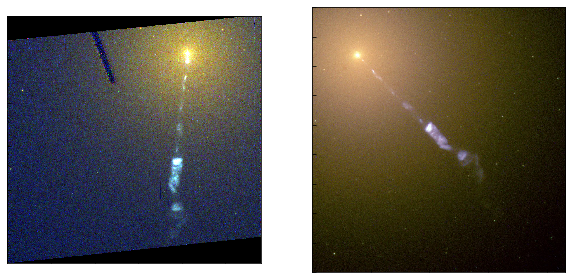

In [7]:
# show the composed image
fig, ax = plt.subplots(1,2, figsize=(10,8))
im1 = imread('figures/M87_jet_rgb.png')
ax[0].imshow(im1)
im2 = imread('figures/M87_jet_wiki.jpg')
ax[1].imshow(im2)
if True: # set axies
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])

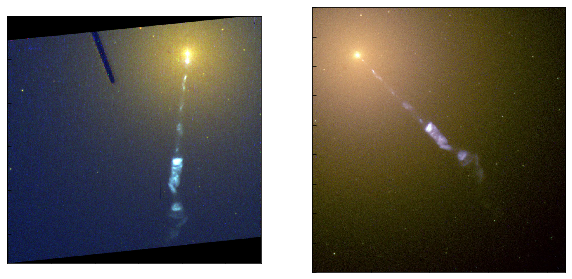

In [6]:
from astropy.convolution import Gaussian2DKernel, convolve

fig, ax = plt.subplots(1,2, figsize=(10,8))
im1 = imread('figures/M87_jet_rgb.png')
kernel = Gaussian2DKernel(x_stddev=1)
im1_conv = np.zeros_like(im1)
for i in range(3):
    im1_conv[:,:,i] = convolve(im1[:, :, i], kernel)
ax[0].imshow(im1_conv)
im2 = imread('figures/M87_jet_wiki.jpg')
ax[1].imshow(im2)
if True: # set axies
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])

<div align="center">
<span> That's all, Thanks</span>
</div>